# Data Science Workflow

1. Loading and Visualizing the Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
from jupyterworkflow.data import load_data

In [3]:
data = load_data()
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


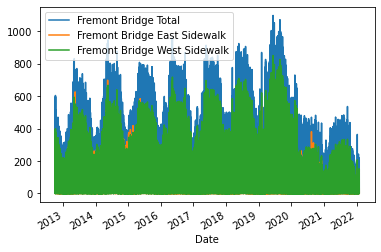

In [4]:
data.plot();

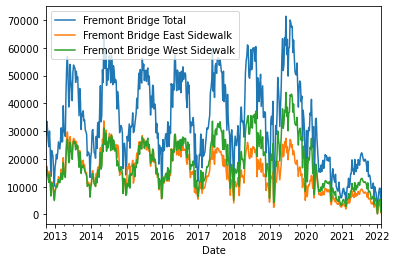

In [5]:
data.resample('W').sum().plot();

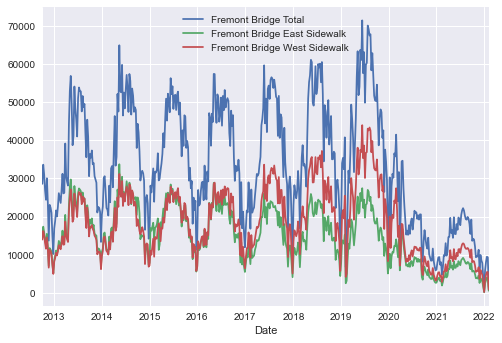

In [6]:
plt.style.use('seaborn')
data.resample('W').sum().plot();

2. Further Data Exploration

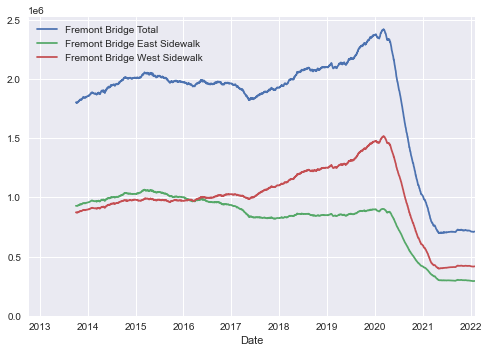

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

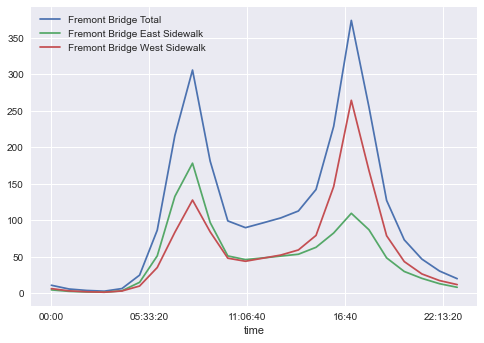

In [8]:
data.groupby(data.index.time).mean().plot();

In [9]:
pivoted = data.pivot_table('Fremont Bridge Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


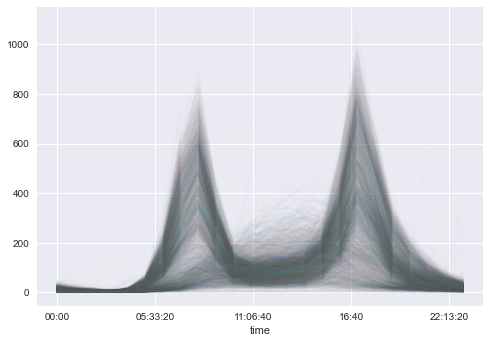

In [10]:
pivoted.plot(legend=False, alpha=0.01);

3. Version Control with Git and GitHub
    - Creating a repo in GitHub
    - Pushing this notebook to the repo

4. Working with Data and GitHub
    - Created the load_data function
    - Refactored the cells
    - Push the changes

5. Creating a python package
    - mkdir jupyterworkflow
    - code jupyterworkflow/__init__.py # creating a init file
    - code jupyterworkflow/data.py # creating the script to load data
    - push the changes

In [11]:
load_data?

Signature:
load_data(
    filename='Fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Docstring:
Download and cache fremont data 
Parameters
----------
filename: string (optional)
    location to save the data
url: string (optional)
    web location of the data
force_download: bool (optional)
    if True, force redownload of data

Returns
-------
data: pandas.DataFrame
    The fremont bridge data
File:      a:\vs_code\python\ds_workflow\jupyter-ds-workflow\jupyterworkflow\data.py
Type:      function


In [12]:
load_data??

Signature:
load_data(
    filename='Fremont.csv',
    url='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
    force_download=False,
)
Source:   
def load_data(filename='Fremont.csv', url=FREEMONT_URL, force_download=False):
    """ Download and cache fremont data 
        Parameters
        ----------
        filename: string (optional)
            location to save the data
        url: string (optional)
            web location of the data
        force_download: bool (optional)
            if True, force redownload of data
        
        Returns
        -------
        data: pandas.DataFrame
            The fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    return data
File:      a:\vs_code\python\ds_workflow\jupyter-ds-workflow\jupyterworkflow\data.py
Type:      function


6. Unit Testing with Pytest
    - create a new file-> scratch.ipynb
        This contains assert statements
    - create a new dir tests under jupyterworkflow
        - create a new test_data.py script
        - Run pytest: python -m pytest jupyterworkflow
    - create a Makefile to remember the test
        - Run: make test


7. Refactoring for speed

- The process of data loading is slow because in data.py, "parse_dates=True" has to parse for all the strings.
- Made changes in data.py and run make test
- git push (data.py)

8. Debugging a Broken Function
- change time formath from %H to %I in data.py
- add assert statement in test_data.py
    - Run: make test

9. Further Data Exploration: PCA and GMM

In [14]:
X = pivoted.fillna(0).T.values
X.shape

(3407, 24)

In [15]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [16]:
X2.shape

(3407, 2)

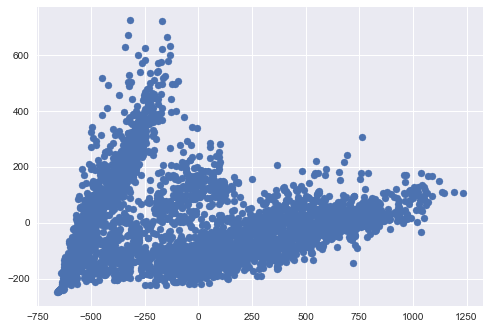

In [17]:
plt.scatter(X2[:, 0], X2[:, 1])

In [18]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

C:\Users\VISHNU~1.PRA\AppData\Local\Temp/ipykernel_21172/1076991882.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


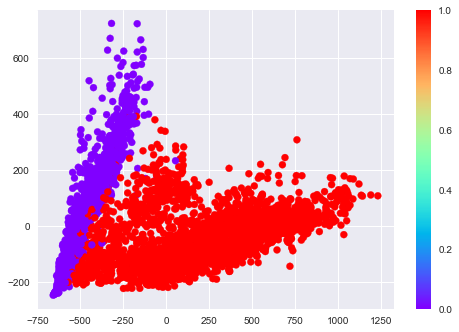

In [21]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow');
plt.colorbar()

<AxesSubplot:xlabel='time'>

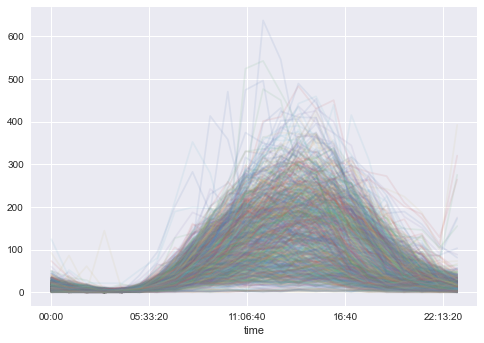

In [22]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)

<AxesSubplot:xlabel='time'>

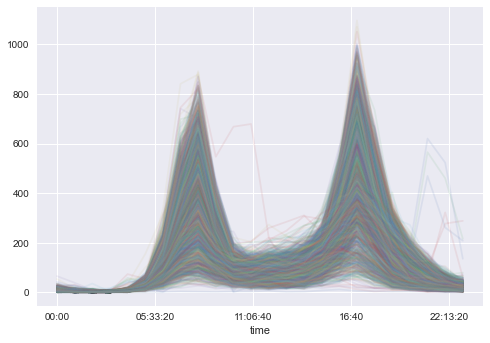

In [23]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)

In [24]:
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2022-01-22, 2022-01-23, 2022-01-24, 2022-01-25, 2022-01-26, 2022-01-27,
       2022-01-28, 2022-01-29, 2022-01-30, 2022-01-31],
      dtype='object', length=3407)

Text(0.5, 1.0, 'Red Cluster')

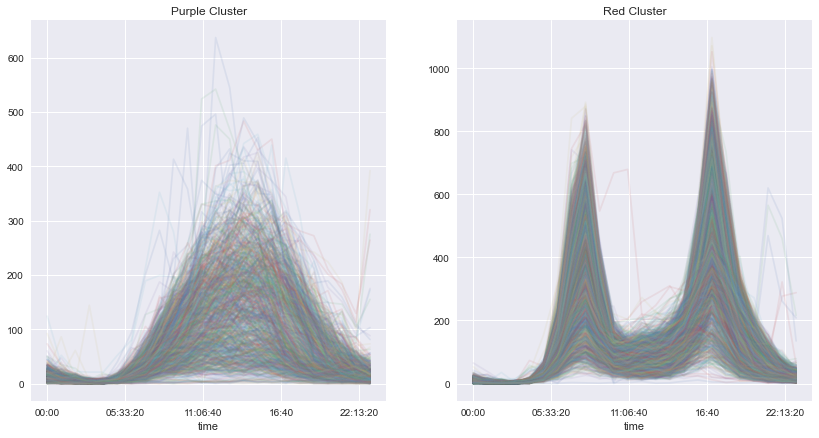

In [33]:
# Both the plots in one frame

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

In [28]:
# Comparing with day of week
import pandas as pd
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

C:\Users\VISHNU~1.PRA\AppData\Local\Temp/ipykernel_21172/3864981101.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


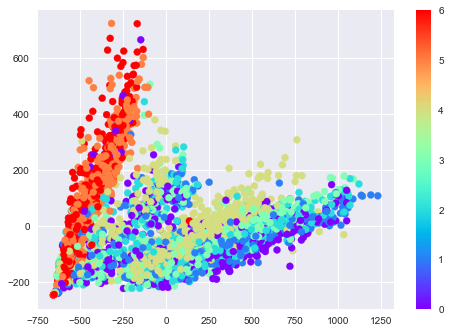

In [30]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow');
plt.colorbar();

In [31]:
# Analyzing Outliers
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)] # Holidays during year commute is high

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31'],
              dtype='datetime64[ns]', length=2341, freq=None)

10. Cleaning up NoteBook
    - A. Get/Load data
    - B. Data Exploration
    - C. PCA
    - D. Unsupervised Clustering via GMM
    